<a href="https://colab.research.google.com/github/RoaaM/arabic_tweet_nlp/blob/main/arabic_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import and install the requierment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from nltk.stem.isri import ISRIStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPool1D, GlobalAveragePooling1D, SimpleRNN, Dropout,SpatialDropout1D, Bidirectional, LSTM, TimeDistributed, Flatten, Activation, Input
from sklearn.metrics import classification_report
import tensorflow as tf
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from keras.preprocessing.text import Tokenizer
from keras.layers.convolutional import Conv1D
from keras.utils import np_utils
from keras.models import Model
from gensim.models import KeyedVectors

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 5.6 MB/s eta 0:00:00


In [ ]:
import demoji
demoji.download_codes()

<ipython-input-4-eb011a9810ad>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
!pip install -q ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 55.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 46.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py)

In [ ]:
import ktrain
from ktrain import text

# Get Data


In [ ]:
df_ = pd.read_csv("/content/Tweets.txt", sep="	", names=["text", "label"])
df_

,text,label
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL
...,...,...
9689,والغاز مش مدعوم يا إنسان؟ وماذا عن الأسمنت وال...,NEG
9690,اغلاق كل الساحات والميادين الكبرى لمنع صلاة ال...,NEG
9691,"#الشروق ""الداخلية"": 400 ألف مواطن تقدموا لأداء...",OBJ
9692,#هتحبك_لو صحتها من النوم علشان تقولها بحبك ;),POS


# 1- Discover and visualize the data

In [ ]:
df = df_.copy()

In [ ]:
print(f"The data shape is {df.shape}, {df.shape[0]} rows and {df.shape[1]} columns(features).")

The data shape is (9694, 2), 9694 rows and 2 columns(features).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9694 entries, 0 to 9693
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9694 non-null   object
 1   label   9694 non-null   object
dtypes: object(2)
memory usage: 151.6+ KB


In [ ]:
df.duplicated().sum()

4

In [ ]:
df.drop_duplicates()

,text,label
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL
...,...,...
9689,والغاز مش مدعوم يا إنسان؟ وماذا عن الأسمنت وال...,NEG
9690,اغلاق كل الساحات والميادين الكبرى لمنع صلاة ال...,NEG
9691,"#الشروق ""الداخلية"": 400 ألف مواطن تقدموا لأداء...",OBJ
9692,#هتحبك_لو صحتها من النوم علشان تقولها بحبك ;),POS


In [ ]:
df['label'].unique()

array(['OBJ', 'POS', 'NEG', 'NEUTRAL'], dtype=object)

In [ ]:
df['label'].value_counts()

OBJ        6470
NEG        1642
NEUTRAL     805
POS         777
Name: label, dtype: int64

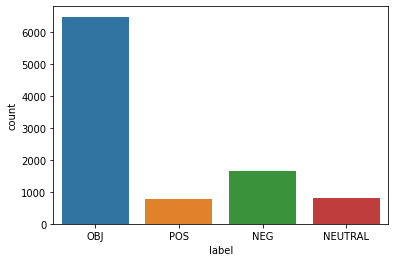

In [ ]:
sns.countplot(x ='label', data = df)

#2-Text Cleaning


In [ ]:
# to check the functions
def test_cleaning(function, sample):
  print(sample, function(sample), sep='\n')


# Remove Stopwords
# i will keep stopwords in bert
stop_words = stopwords.words('arabic')
def remove_stopwords(text):
  return " ".join([word for word in text.split(" ") if word not in stop_words])
print('remove stopwords:')
test_cleaning(remove_stopwords, 'حازم_عبد_العظيم وهو بيرد عليا على تويتر أيام حكم #مرسى    ويقولى " الجيش يدخل ليحل وليس ليحكم" وحازم دلوقتى فى')
print('\n')


# Remove Hashtages
hashtages = re.compile(pattern="#[\w\d]+")
def remove_hashtages(text):
  return hashtages.sub(repl="", string=text)
print('remove hashtages:')
test_cleaning(remove_hashtages, '#حازم_عبد_العظيم وهو بيرد عليا على #تويتر أيام حكم #مرسى    ويقولى " الجيش يدخل ليحل #وليس ليحكم" وحازم #دلوقتى فى')
print('\n')
# hashtags is important in this dataset so i will not remove it i will just remove the hashtag mark with punctuation marks


# Remove Punctuations Marks
punctuation_marks = re.compile(r"""[!"#$%&\'()*+,-./:;<=>?@[\\\]^`{|}~،؟…«“\":\"…”]""")
def remove_punch_marks(text):
  return punctuation_marks.sub(repl="", string=text)
print('remove punctuation marks:')
test_cleaning(remove_punch_marks, df['text'][0])
print('\n')


# Remove Numbers
numbers = re.compile('\d+')
def remove_numbers(text):
  return numbers.sub(repl="", string=text)
print('remove numbers:')
test_cleaning(remove_numbers, df['text'][50])
print('\n')


# Remove Multible whitespace
multiple_whitespace = re.compile('\s{2,}')
def remove_whitespace(text):
  return multiple_whitespace.sub(repl=" ", string=text)
print('remove multiple white space:')
test_cleaning(remove_whitespace,'#حازم_عبد_العظيم وهو بيرد عليا على تويتر أيام حكم #مرسى    ويقولى " الجيش يدخل ليحل وليس ليحكم" وحازم دلوقتى فى')
print('\n')


# remove emojies
# emojies importaant in syntiment analysis i will remove it now for ml model
def remove_emoji(text):
  dem = demoji.findall(text)
  for item in dem.keys():
    text = text.replace(item, '')
  return text
print('remove emojies:')
test_cleaning(remove_emoji,'#غرد_بصوره #تصوير #تصميمي #مطر #جونا_خقه ▼ ▼▼▼ أتمنى يعجبكم وهلون،،،😗')
print('\n')


# remove repeating characters
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
print('remove repeating character:')
test_cleaning(remove_repeating_char, ' السيسي اااااااسهل جداًً# ساعدنا اننا أأنعمل@ ملييييييون شييييييييييييييييييييييييييير #سأنتخب_ا')
print('\n')


# Normalize
def normalize_arabic(text):
    text = re.sub("[إأآا]", r"ا", text)
    text = re.sub("ى", r"ي", text)
    text = re.sub("ة", r"ه", text)
    text = re.sub("گ", r"ك", text)
    return text
print('normalize the text:')
test_cleaning(normalize_arabic, 'السيسي اااااااسهل جداًً# ساعدنا اننا أأنعمل@ ملييييييون شييييييييييييييييييييييييييير #سأنتخب_ا')
print('\n')


# Stemming
def stemmer(text):
    stemr = ISRIStemmer()
    words_tokens = nltk.word_tokenize(text)
    stemmer_string = ' '.join([stemr.stem(words) for words in words_tokens])
    return stemmer_string
print('stemming:')
test_cleaning(stemmer, df['text'][0])
print('\n')

# here i decide to not remove hashtags and the result for stemming not well so i will not use stemming
# and emojes are good for sentiment analysis i will keep it when i use bert or neural network model but i will remove it for ml model
def clean_all(text):
  text = text.lower().strip()
  text = normalize_arabic(text)
  text = remove_whitespace(text)
  text = remove_punch_marks(text)
  text = remove_numbers(text)
  # text = remove_stopwords(text)
  # text = remove_emoji(text)
  text = remove_repeating_char(text)
  # text = stemmer(text)
  return text

print('clean all:')
test_cleaning(clean_all, 'عايز تكون عضويي في حمله المشير يعجبكم وهلون،،،😗   ااااالسيسي سهل جداًً# ساعدنا اننا نعملى@ مليون شييييييييييييييييييييييييييير #سأنتخب_السيسي …')

remove stopwords:
حازم_عبد_العظيم وهو بيرد عليا على تويتر أيام حكم #مرسى    ويقولى " الجيش يدخل ليحل وليس ليحكم" وحازم دلوقتى فى
حازم_عبد_العظيم بيرد عليا تويتر أيام حكم #مرسى    ويقولى " الجيش يدخل ليحل وليس ليحكم" وحازم دلوقتى فى


remove hashtages:
#حازم_عبد_العظيم وهو بيرد عليا على #تويتر أيام حكم #مرسى    ويقولى " الجيش يدخل ليحل #وليس ليحكم" وحازم #دلوقتى فى
 وهو بيرد عليا على  أيام حكم     ويقولى " الجيش يدخل ليحل  ليحكم" وحازم  فى


remove punctuation marks:
بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان
بعد استقالة رئيس المحكمة_الدستورية ننتظر استقالة رئيس_القضاء السودان


remove numbers:
دعمرو حمزاوي برنامج " أخر كلام " 11 إبريل 2012
دعمرو حمزاوي برنامج " أخر كلام "  إبريل 


remove multiple white space:
#حازم_عبد_العظيم وهو بيرد عليا على تويتر أيام حكم #مرسى    ويقولى " الجيش يدخل ليحل وليس ليحكم" وحازم دلوقتى فى
#حازم_عبد_العظيم وهو بيرد عليا على تويتر أيام حكم #مرسى ويقولى " الجيش يدخل ليحل وليس ليحكم" وحازم دلوقتى فى


remove emojies:
#غرد_بصوره #

#3- prepare data

In [ ]:
# Encoding the label (NEG --> 0, NEUTRAL --> 1, OBJ --> 2, POS --> 3)

label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [ ]:
df.head()

,text,label
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,2
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,3
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,0
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,2
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,1


In [ ]:
clean_text = []
for text in df['text']:
  new = clean_all(text)
  clean_text.append(new)

In [ ]:
clean_dataset = pd.DataFrame({'text':clean_text, 'label':df['label']})

In [ ]:
clean_dataset.head(4)

,text,label
0,بعد استقاله رئيس المحكمه_الدستوريه نتظر استقال...,2
1,اهنئ الدكتور احمد جمال الدين القيادي بحزب مصر ...,3
2,البرادعي يستقوي بامريكا مرهاخري و يرسل عصام ال...,0
3,الحريه_والعداله شاهد الان ليله_الاتحاديه اول ف...,2


#3- Feature Extraction

In [ ]:
X = clean_dataset['text']
y = clean_dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7755,), (1939,), (7755,), (1939,))

In [ ]:
# tf-idf
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# **-Randomized Search & Cross Validation and base line**

In [ ]:
def randomized_search(model, parameters):
    # Use f1_weighted as scoring since we already know that the dataset has imbalance labels
    random = RandomizedSearchCV(model, parameters, cv=5, scoring='f1_weighted')
    random.fit(X_train, y_train)
    print()
    print('Best Score : ',random.best_score_)
    print('Best parameters : ')
    print(random.best_params_)

here I will make base line to see the result from ML model and the try to improve the result by Neural Network

In [ ]:
svc = SVC(class_weight='balanced')
svc_param = {'C':[0.001, 0.01, 0.1, 1, 10],
              'kernel':['linear','poly','rbf','sigmoid'],
              'gamma':['scale','auto']}
randomized_search(svc, svc_param)


Best Score :  0.6277052521067474
Best parameters : 
{'kernel': 'linear', 'gamma': 'auto', 'C': 1}




```
this resut after preprocess the data and i remove the stopwords and emojies
```



In [ ]:
SVC_model = SVC(class_weight='balanced',C=10,gamma='scale',kernel='linear')
SVC_model.fit(X_train, y_train)
pred = SVC_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.46      0.38      0.42       333
           1       0.26      0.15      0.19       170
           2       0.73      0.86      0.79      1276
           3       0.40      0.20      0.27       160

    accuracy                           0.66      1939
   macro avg       0.46      0.40      0.42      1939
weighted avg       0.62      0.66      0.63      1939



#RNN




<mark> prepare data for NN model



In [ ]:
seq_len = 80
max_vocab = 20000


tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(clean_dataset.text)


X_train, X_test, y_train, y_test = train_test_split(clean_dataset.text, clean_dataset.label,
                                                    test_size=0.2, random_state = 42)

y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=seq_len)

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=seq_len)

## -bidirectional LSTM

In [ ]:
embedding_dim = 40

inp = Input(shape=(seq_len,))
x = Embedding(max_vocab, embedding_dim)(inp)
x = Bidirectional(LSTM(32, recurrent_dropout=.5))(x)
x = Dense(32)(x)
y = Dense(4, activation='softmax')(x)

NN = Model(inp, y)
NN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80)]              0         
                                                                 
 embedding (Embedding)       (None, 80, 40)            800000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               18688     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 820,900
Trainable params: 820,900
Non-trainable params: 0
_______________________________________________________

In [ ]:
NN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = NN.fit(X_train, y_train_cat,
                 validation_split=.2,
                 epochs=2, batch_size=46, verbose=1, steps_per_epoch=60)

Epoch 1/2
60/60 [==============================] - 39s 554ms/step - loss: 1.0177 - accuracy: 0.6779 - val_loss: 0.9622 - val_accuracy: 0.6699
Epoch 2/2
60/60 [==============================] - 33s 548ms/step - loss: 0.9568 - accuracy: 0.6638 - val_loss: 0.9292 - val_accuracy: 0.6699


In [ ]:
y_pred = np.argmax(NN.predict(X_test), axis=1)
print('[loss, acc]: ',NN.evaluate(X_test, y_test_cat))
print('\nf1 score for test set: ',f1_score(y_test, y_pred, average='weighted'))

61/61 [==============================] - 3s 44ms/step - loss: 0.9605 - accuracy: 0.6581
[loss, acc]:  [0.9604543447494507, 0.6580711603164673]

f1 score for test set:  0.5223631812264743


## -LSTM


---
```
# first archatecture
```
---



In [ ]:
lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 32, input_length=max_sequence_length),
    tf.keras.layers.LSTM(units=64, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
lstm.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
lstm.fit(x_train,y_train, batch_size=64, epochs=2)

Epoch 1/2
122/122 [==============================] - 3s 9ms/step - loss: 0.4526 - accuracy: 0.6579
Epoch 2/2
122/122 [==============================] - 1s 9ms/step - loss: 0.4166 - accuracy: 0.6646


In [ ]:
y_pred = np.argmax(lstm.predict(x_test), axis=1)
print('[loss, acc]: ', lstm.evaluate(x_test, y_test_cat))
print('\nf1 score for test set: ', f1_score(y_test, y_pred, average='weighted'))

61/61 [==============================] - 0s 5ms/step - loss: 0.4212 - accuracy: 0.6581
[loss, acc]:  [0.4211788773536682, 0.6580711603164673]

f1 score for test set:  0.5223631812264743



---
```
# second archatecture
```
---



In [ ]:
input_shape = (np.array(X_train).shape[1],)
embedding_dim = 20
emb_vocab = max_vocab + 1

x_in = Input(shape=input_shape)
x = Embedding(emb_vocab,embedding_dim)(x_in)
x = LSTM(15,return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(32,activation='relu')(x)
x = Dense(4,activation='softmax')(x)
model = tf.keras.models.Model(x_in,x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 80, 20)            400020    
                                                                 
 lstm_1 (LSTM)               (None, 80, 15)            2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 32)                512       
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                           

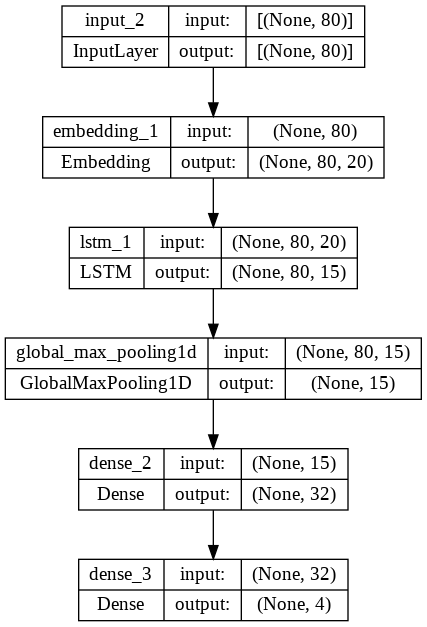

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

es_cb = tf.keras.callbacks.EarlyStopping('loss',patience=3)

model.fit(X_train, y_train_cat, epochs=50, batch_size=16, callbacks=[es_cb], validation_split=.2)

Epoch 1/50
388/388 [==============================] - 8s 9ms/step - loss: 1.0114 - accuracy: 0.6696 - val_loss: 0.9721 - val_accuracy: 0.6699
Epoch 2/50
388/388 [==============================] - 3s 8ms/step - loss: 0.9589 - accuracy: 0.6697 - val_loss: 0.9303 - val_accuracy: 0.6699
Epoch 3/50
388/388 [==============================] - 3s 9ms/step - loss: 0.8022 - accuracy: 0.6995 - val_loss: 0.9208 - val_accuracy: 0.6383
Epoch 4/50
388/388 [==============================] - 3s 8ms/step - loss: 0.5712 - accuracy: 0.7793 - val_loss: 1.0729 - val_accuracy: 0.6486
Epoch 5/50
388/388 [==============================] - 3s 9ms/step - loss: 0.4214 - accuracy: 0.8335 - val_loss: 1.2755 - val_accuracy: 0.6396
Epoch 6/50
388/388 [==============================] - 3s 9ms/step - loss: 0.3102 - accuracy: 0.8773 - val_loss: 1.3923 - val_accuracy: 0.6306
Epoch 7/50
388/388 [==============================] - 3s 9ms/step - loss: 0.2219 - accuracy: 0.9204 - val_loss: 1.6085 - val_accuracy: 0.6132
Epoch 

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print('[loss, acc]: ',model.evaluate(X_test, y_test_cat))
print('\nf1 score for test set: ',f1_score(y_test, y_pred, average='weighted'))

61/61 [==============================] - 0s 5ms/step - loss: 2.8104 - accuracy: 0.6117
[loss, acc]:  [2.810445785522461, 0.6116554737091064]

f1 score for test set:  0.5993734449208051


# arabic sentiment analysis by word2vec

In [ ]:
def load_w2v(file_path,binary):
    return KeyedVectors.load_word2vec_format(file_path,binary=binary)

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ar.vec

--2023-01-13 15:39:36--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ar.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1610017300 (1.5G) [binary/octet-stream]
Saving to: ‘wiki.ar.vec’

wiki.ar.vec         100%[===================>]   1.50G  25.3MB/s    in 62s     

2023-01-13 15:40:39 (24.7 MB/s) - ‘wiki.ar.vec’ saved [1610017300/1610017300]



In [ ]:
w2v_file = r'/content/wiki.ar.vec'
w2v =  KeyedVectors.load_word2vec_format(w2v_file, binary=False)
print(len(w2v.vocab))

610977


In [ ]:
max_sequence_length=100
max_nm_words=len(w2v.vocab)
embeding_dim=150

In [ ]:
X = clean_dataset['text']
y = clean_dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=max_nm_words)
tokenizer.fit_on_texts(clean_dataset['text'])

x_train = tokenizer.texts_to_sequences(X_train)
x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = tokenizer.texts_to_sequences(X_test)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

word_index=tokenizer.word_index
vocab_size=len(word_index)

print(vocab_size)

33218


In [ ]:

embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    try:
        embedding_vector = w2v[word]
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [ ]:
sentence_indices = Input(shape=(max_sequence_length,),dtype='int32')
embedding_layer = Embedding(vocab_size+1 , embeding_dim,  input_length=max_sequence_length, trainable=False)
embeddings = embedding_layer(sentence_indices)
X = LSTM(60, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)(embeddings)
X = GlobalMaxPool1D()(X)
X = Dropout(0.2)(X)
X = Dense(128)(X)
X = Activation("relu")(X)
X = Dropout(0.2)(X)
X = Dense(512)(X)
X = Activation("relu")(X)
X = Dropout(0.2)(X)
X = Dense(4)(X)
X = Activation('softmax')(X)
model = Model(inputs=sentence_indices,outputs=X)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
                              verbose=1,
                              patience=3,
                              min_delta=0.001,
                              monitor="val_loss",
                              restore_best_weights=True
                              )

In [ ]:
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
194/194 [==============================] - 78s 388ms/step - loss: 0.9867 - accuracy: 0.6672 - val_loss: 0.9594 - val_accuracy: 0.6699
Epoch 2/10
194/194 [==============================] - 72s 373ms/step - loss: 0.9626 - accuracy: 0.6697 - val_loss: 0.9420 - val_accuracy: 0.6699
Epoch 3/10
194/194 [==============================] - 73s 376ms/step - loss: 0.9468 - accuracy: 0.6697 - val_loss: 0.9260 - val_accuracy: 0.6699
Epoch 4/10
194/194 [==============================] - 73s 375ms/step - loss: 0.9379 - accuracy: 0.6697 - val_loss: 0.9292 - val_accuracy: 0.6699
Epoch 5/10
194/194 [==============================] - 75s 385ms/step - loss: 0.9281 - accuracy: 0.6697 - val_loss: 0.9254 - val_accuracy: 0.6699
Epoch 6/10
194/194 [==============================] - 73s 377ms/step - loss: 0.9159 - accuracy: 0.6696 - val_loss: 0.9155 - val_accuracy: 0.6699
Epoch 7/10
194/194 [==============================] - 74s 380ms/step - loss: 0.9043 - accuracy: 0.6701 - val_loss: 0.9171 - val_ac

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print('[loss, acc]: ', model.evaluate(x_test, y_test_cat))
print('\nf1 score for test set: ', f1_score(y_test, y_pred, average='weighted'))

61/61 [==============================] - 2s 31ms/step - loss: 0.9461 - accuracy: 0.6581
[loss, acc]:  [0.9460707306861877, 0.6580711603164673]

f1 score for test set:  0.5223631812264743


Another try with differemt optimizer

In [ ]:
sentence_indices = Input(shape=(max_sequence_length,),dtype='int32')
embedding_layer = Embedding(vocab_size+1 , embeding_dim,  input_length=max_sequence_length)
embeddings = embedding_layer(sentence_indices)
X = LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)(embeddings)
X = GlobalMaxPool1D()(X)
X = Dropout(0.2)(X)
X = Dense(128)(X)
X = Activation("LeakyReLU")(X)
X = Dropout(0.2)(X)
X = Dense(512)(X)
X = Activation("LeakyReLU")(X)
X = Dropout(0.2)(X)
X = Dense(4)(X)
X = Activation('softmax')(X)
model = Model(inputs=sentence_indices,outputs=X)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
97/97 [==============================] - 43s 421ms/step - loss: 0.9994 - accuracy: 0.6668 - val_loss: 0.9085 - val_accuracy: 0.6699
Epoch 2/10
97/97 [==============================] - 41s 421ms/step - loss: 0.7418 - accuracy: 0.7282 - val_loss: 0.9734 - val_accuracy: 0.6686
Epoch 3/10
97/97 [==============================] - 41s 425ms/step - loss: 0.4508 - accuracy: 0.8148 - val_loss: 1.1660 - val_accuracy: 0.6293
Epoch 4/10
97/97 [==============================] - 41s 420ms/step - loss: 0.2665 - accuracy: 0.9010 - val_loss: 1.3974 - val_accuracy: 0.6125
Epoch 5/10
97/97 [==============================] - 42s 430ms/step - loss: 0.1082 - accuracy: 0.9647 - val_loss: 1.6669 - val_accuracy: 0.6151
Epoch 6/10
97/97 [==============================] - 41s 419ms/step - loss: 0.0538 - accuracy: 0.9842 - val_loss: 1.7616 - val_accuracy: 0.6015
Epoch 7/10
97/97 [==============================] - 40s 416ms/step - loss: 0.0450 - accuracy: 0.9890 - val_loss: 1.5876 - val_accuracy: 0.6151

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print('[loss, acc]: ', model.evaluate(x_test, y_test_cat))
print('\nf1 score for test set: ', f1_score(y_test, y_pred, average='weighted'))

61/61 [==============================] - 2s 31ms/step - loss: 1.9061 - accuracy: 0.6302
[loss, acc]:  [1.906056523323059, 0.6302217841148376]

f1 score for test set:  0.611011640656305




```
the best result ---> f1 score = 0.61 this from LSTM with adam optimizer better than rmsprop optimizer this give result f1 score = 0.52
```




#trying tuning bert with ktrain


In [ ]:
from ktrain import text

In [ ]:
clean_dataset.label.unique()

array([2, 3, 0, 1])

In [ ]:
X = clean_dataset['text'].tolist()
y = clean_dataset['label'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_array(x_train = X_train,
                                                                      y_train = y_train,
                                                                      x_test = X_test,
                                                                      y_test = y_test,
                                                                      class_names = [0, 1, 2, 3],
                                                                      preprocess_mode = 'bert',
                                                                      ngram_range = 1,
                                                                      maxlen = 320) # bert

downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: ar


Is Multi-Label? False
preprocessing test...
language: ar


task: text classification


In [ ]:
model = text.text_classifier('bert',
                              train_data = (X_train, y_train),
                              preproc = preproc)

Is Multi-Label? False
maxlen is 320
done.


In [ ]:
learner = ktrain.get_learner(model,
                             train_data = (X_train, y_train),
                             batch_size = 8)

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
970/970 [==============================] - 625s 623ms/step - loss: 1.0453 - accuracy: 0.6504
Epoch 2/1024
970/970 [==============================] - 240s 247ms/step - loss: 6.5451 - accuracy: 0.5648


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


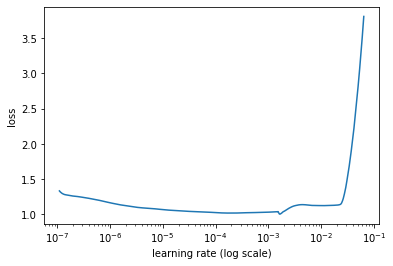

In [ ]:
learner.lr_plot()

In [ ]:
learner.reset_weights()

Model weights have been reset.


In [ ]:
history = learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/3
970/970 [==============================] - 630s 630ms/step - loss: 0.9438 - accuracy: 0.6627
Epoch 2/3
970/970 [==============================] - 614s 633ms/step - loss: 0.8533 - accuracy: 0.6711
Epoch 3/3
970/970 [==============================] - 614s 633ms/step - loss: 0.6892 - accuracy: 0.7322


In [ ]:
learner.validate(val_data = (X_test, y_test))

61/61 [==============================] - 50s 745ms/step
              precision    recall  f1-score   support

           0       0.49      0.41      0.44       332
           1       0.34      0.14      0.20       146
           2       0.78      0.89      0.83      1325
           3       0.44      0.26      0.32       136

    accuracy                           0.71      1939
   macro avg       0.51      0.42      0.45      1939
weighted avg       0.67      0.71      0.68      1939



array([[ 135,   15,  178,    4],
       [  52,   21,   70,    3],
       [  85,   21, 1181,   38],
       [   5,    5,   91,   35]])

<mark> this method give weighted f1 result 0.68 it's better than base line (0.63)

---


```
result weighted f1=39, acc=69 -- batch size 8, maxlen 320, lr 1e-5, n gram 1
result weighted f1=35, acc=65 -- batch size 4, maxlen 350, lr 1e-4, n gram 1
result weighted f1=40, acc=70 -- batch size 8, maxlen 320, lr 1e-5, n gram 2
result weighted f1=60, acc=70 -- batch size 8, maxlen 320, lr 1e-5, n gram 3
result weighted f1=65, acc=68 -- batch size 8, maxlen 320, lr 1e-5
```


---

#CNN

In [ ]:
X = clean_dataset['text']
y = clean_dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer.fit_on_texts(X_train)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
Xcnn_train = pad_sequences(train_sequences, padding='post', maxlen=100)
Xcnn_test = pad_sequences(test_sequences, padding='post', maxlen=100)

In [ ]:
y_train_ = np_utils.to_categorical(y_train,4)
y_test_ = np_utils.to_categorical(y_test,4)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size+1, 32, input_length=max_sequence_length))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 32)           1063008   
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 32)           3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_39 (Dense)            (None, 250)               400250    
                                                                 
 dense_40 (Dense)            (None, 4)                 1004      
                                                      

In [ ]:
model.fit(Xcnn_train, y_train_, epochs=10, batch_size=64, verbose=2, validation_split=0.2)

Epoch 1/10
97/97 - 1s - loss: 0.9756 - accuracy: 0.6644 - val_loss: 0.9144 - val_accuracy: 0.6699 - 1s/epoch - 13ms/step
Epoch 2/10
97/97 - 1s - loss: 0.7842 - accuracy: 0.7039 - val_loss: 0.8750 - val_accuracy: 0.6763 - 515ms/epoch - 5ms/step
Epoch 3/10
97/97 - 1s - loss: 0.4666 - accuracy: 0.8124 - val_loss: 1.0256 - val_accuracy: 0.6493 - 527ms/epoch - 5ms/step
Epoch 4/10
97/97 - 0s - loss: 0.2398 - accuracy: 0.9239 - val_loss: 1.2632 - val_accuracy: 0.6370 - 453ms/epoch - 5ms/step
Epoch 5/10
97/97 - 0s - loss: 0.0994 - accuracy: 0.9753 - val_loss: 1.4727 - val_accuracy: 0.5990 - 441ms/epoch - 5ms/step
Epoch 6/10
97/97 - 0s - loss: 0.0546 - accuracy: 0.9876 - val_loss: 1.6140 - val_accuracy: 0.6138 - 417ms/epoch - 4ms/step
Epoch 7/10
97/97 - 0s - loss: 0.0351 - accuracy: 0.9923 - val_loss: 1.8249 - val_accuracy: 0.6525 - 433ms/epoch - 4ms/step
Epoch 8/10
97/97 - 0s - loss: 0.0289 - accuracy: 0.9924 - val_loss: 1.9522 - val_accuracy: 0.6596 - 419ms/epoch - 4ms/step
Epoch 9/10
97/97 -